# DSCI 617
## Lahman Baseball Dataset 
**Anusha Cherupalla**

## Introduction
Importing the required tools from pyspark and creating a SparkSession object

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, expr
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

## Section A - Load and Prepare Data

### A.1 - Load Data
In this subsection, we will load the People.csv, Batting.csv, Teams.csv, and TeamsFranchise.csv data files into DataFrames and determine the number of records in each DataFrame.

In [0]:
# Load the data files into DataFrames
# Load People.csv
people = spark.read.format("csv").option("header", "true").load("/FileStore/tables/lahman/People.csv")

# Load Batting.csv
batting = spark.read.format("csv").option("header", "true").load("/FileStore/tables/lahman/Batting.csv")

# Load Teams.csv
teams = spark.read.format("csv").option("header", "true").load("/FileStore/tables/lahman/Teams.csv")

# Load TeamsFranchises.csv
franchises = spark.read.format("csv").option("header", "true").load("/FileStore/tables/lahman/TeamsFranchises.csv")

# Determine the number of records in each DataFrame
people_count = people.count()
batting_count = batting.count()
teams_count = teams.count()
franchises_count = franchises.count()

# Display the counts
print(f"Number of records in people: {people_count}")
print(f"Number of records in batting: {batting_count}")
print(f"Number of records in teams: {teams_count}")
print(f"Number of records in franchises: {franchises_count}")

Number of records in people: 20150
Number of records in batting: 108789
Number of records in teams: 2955
Number of records in franchises: 120


###A.2 - The People Table
Now let's explore the People table.

In [0]:
# Print the list of column names in the people DataFrame
print(people.columns)

# Select the desired columns and display the first 5 rows
people_selected = people.select("playerID", "nameFirst", "nameLast", "weight", "height")
people_selected.show(5)

# Calculate and display the number of records with missing values
people_missing_count = people.filter(people.playerID.isNull() | people.nameFirst.isNull() | people.nameLast.isNull() | people.weight.isNull() | people.height.isNull()).count()
print(f"Number of records with missing values in people: {people_missing_count}")

# Calculate the number of missing values in each column and display the results
people_missing_columns = ["playerID", "nameFirst", "nameLast", "weight", "height"]
people_missing_values = [people.filter(col(column).isNull()).count() for column in people_missing_columns]
for column, missing_values in zip(people_missing_columns, people_missing_values):
    print(f"Number of missing values in {column}: {missing_values}")

['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay', 'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID', 'bbrefID']
+---------+---------+--------+------+------+
| playerID|nameFirst|nameLast|weight|height|
+---------+---------+--------+------+------+
|aardsda01|    David| Aardsma|   215|    75|
|aaronha01|     Hank|   Aaron|   180|    72|
|aaronto01|   Tommie|   Aaron|   190|    75|
| aasedo01|      Don|    Aase|   190|    75|
| abadan01|     Andy|    Abad|   184|    73|
+---------+---------+--------+------+------+
only showing top 5 rows

Number of records with missing values in people: 872
Number of missing values in playerID: 0
Number of missing values in nameFirst: 37
Number of missing values in nameLast: 0
Number of missing values in weight: 816
Number of missing values in height: 736


###A.3 - The Batting Table
Now let's explore the Batting table.

In [0]:
# Print the list of column names in the batting DataFrame
print(batting.columns)

# Display the first 5 rows of the DataFrame
batting.show(5)

# Calculate and display the number of records with missing values
batting_missing_count = batting.filter(batting.playerID.isNull() | batting.yearID.isNull() | batting.stint.isNull() | batting.teamID.isNull()).count()
print(f"Number of records with missing values in batting: {batting_missing_count}")

# Calculate the number of missing values in each column and display the results
batting_missing_columns = ["playerID", "yearID", "stint", "teamID"]
batting_missing_values = [batting.filter(col(column).isNull()).count() for column in batting_missing_columns]
for column, missing_values in zip(batting_missing_columns, batting_missing_values):
    print(f"Number of missing values in {column}: {missing_values}")

# Fill in missing values with 0
batting = batting.fillna(0)

# Display the first 5 rows again
batting.show(5)

['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+
| playerID|yearID|stint|teamID|lgID|  G| AB|  R|  H| 2B| 3B| HR|RBI| SB| CS| BB| SO| IBB| HBP|  SH|  SF|GIDP|
+---------+------+-----+------+----+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+
|abercda01|  1871|    1|   TRO|  NA|  1|  4|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|null|null|null|null|   0|
| addybo01|  1871|    1|   RC1|  NA| 25|118| 30| 32|  6|  0|  0| 13|  8|  1|  4|  0|null|null|null|null|   0|
|allisar01|  1871|    1|   CL1|  NA| 29|137| 28| 40|  4|  5|  0| 19|  3|  1|  2|  5|null|null|null|null|   1|
|allisdo01|  1871|    1|   WS3|  NA| 27|133| 28| 44| 10|  2|  2| 27|  1|  1|  0|  2|null|null|null|null|   0|
|ansonca01|  1871|    1|   RC1|  NA| 25|120| 29| 39| 11|  3|  0| 16|  6|  2|

###A.4 – The Teams Table

In [0]:
# Print the list of column names in the teams DataFrame
print(teams.columns)

# Select the desired columns and display the first 5 rows
teams_selected = teams.select("yearID", "name", "teamID", "franchID", "lgID")
teams_selected.show(5, truncate=False)

# Calculate and display the number of records with missing values
teams_missing_count = teams.filter(teams.yearID.isNull() | teams.name.isNull() | teams.teamID.isNull() | teams.franchID.isNull() | teams.lgID.isNull()).count()
print(f"Number of records with missing values in teams: {teams_missing_count}")

['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome', 'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro']
+------+-----------------------+------+--------+----+
|yearID|name                   |teamID|franchID|lgID|
+------+-----------------------+------+--------+----+
|1871  |Boston Red Stockings   |BS1   |BNA     |NA  |
|1871  |Chicago White Stockings|CH1   |CNA     |NA  |
|1871  |Cleveland Forest Citys |CL1   |CFC     |NA  |
|1871  |Fort Wayne Kekiongas   |FW1   |KEK     |NA  |
|1871  |New York Mutuals       |NY2   |NNA     |NA  |
+------+-----------------------+------+--------+----+
only showing top 5 rows

Number of records with missing values in teams: 0


###A.5 – The Franchises Table

In [0]:
# Print the list of column names in the franchises DataFrame
print(franchises.columns)

# Display the first 5 rows of the DataFrame
franchises.show(5, truncate=False)

# Calculate and display the number of records with missing values
franchises_missing_count = franchises.filter(franchises.franchID.isNull() | franchises.franchName.isNull() | franchises.active.isNull()).count()
print(f"Number of records with missing values in franchises: {franchises_missing_count}")

# Calculate the number of missing values in each column and display the results
franchises_missing_columns = ["franchID", "franchName", "active"]
franchises_missing_values = [franchises.filter(col(column).isNull()).count() for column in franchises_missing_columns]
for column, missing_values in zip(franchises_missing_columns, franchises_missing_values):
    print(f"Number of missing values in {column}: {missing_values}")

['franchID', 'franchName', 'active', 'NAassoc']
+--------+-----------------------------+------+-------+
|franchID|franchName                   |active|NAassoc|
+--------+-----------------------------+------+-------+
|ALT     |Altoona Mountain City        |N     |null   |
|ANA     |Los Angeles Angels of Anaheim|Y     |null   |
|ARI     |Arizona Diamondbacks         |Y     |null   |
|ATH     |Philadelphia Athletics       |N     |PNA    |
|ATL     |Atlanta Braves               |Y     |BNA    |
+--------+-----------------------------+------+-------+
only showing top 5 rows

Number of records with missing values in franchises: 0
Number of missing values in franchID: 0
Number of missing values in franchName: 0
Number of missing values in active: 0


##Section B – Teams and Franchises

###B.1 – Number of Franchises by Year

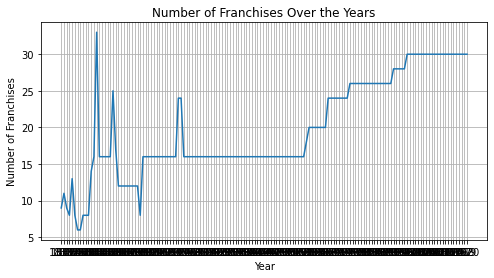

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import countDistinct

# Grouping and aggregating the teams DataFrame
franchise_counts = teams.groupBy("yearID").agg(countDistinct("franchID").alias("franchise_count"))
franchise_counts = franchise_counts.orderBy("yearID")

# Converting the Spark DataFrame to Pandas DataFrame
franchise_counts_pd = franchise_counts.toPandas()

# Creating the line plot
plt.figure(figsize=(8, 4))
plt.plot(franchise_counts_pd["yearID"], franchise_counts_pd["franchise_count"])

# Customizing the plot
plt.xlabel("Year")
plt.ylabel("Number of Franchises")
plt.title("Number of Franchises Over the Years")
plt.grid(True)

# Displaying the plot
plt.show()

### B.2-Franchise Statistics

In [0]:
from pyspark.sql.functions import countDistinct, min, max, sum, round

# Grouping the records of the teams DataFrame by franchID
franchise_summary = teams.groupBy("franchID").agg(
    countDistinct("name").alias("num_names"),
    min("yearID").alias("first_year"),
    max("yearID").alias("last_year"),
    countDistinct("yearID").alias("seasons"),
    sum("W").alias("W"),
    sum("L").alias("L")
)

# Adding the WL_ratio column
franchise_summary = franchise_summary.withColumn("WL_ratio", round(franchise_summary["W"] / franchise_summary["L"], 4))

# Joining with the franchises table
franchise_summary = franchise_summary.join(franchises, "franchID")

# Printing the number of records
print("Number of records in franchise_summary:", franchise_summary.count())

# Displaying the first 10 rows
franchise_summary.show(10, truncate=False)


Number of records in franchise_summary: 120
+--------+---------+----------+---------+-------+-------+-------+--------+-----------------------------+------+-------+
|franchID|num_names|first_year|last_year|seasons|W      |L      |WL_ratio|franchName                   |active|NAassoc|
+--------+---------+----------+---------+-------+-------+-------+--------+-----------------------------+------+-------+
|ALT     |1        |1884      |1884     |1      |6.0    |19.0   |0.3158  |Altoona Mountain City        |N     |null   |
|ANA     |4        |1961      |2020     |60     |4735.0 |4753.0 |0.9962  |Los Angeles Angels of Anaheim|Y     |null   |
|ARI     |1        |1998      |2020     |23     |1788.0 |1836.0 |0.9739  |Arizona Diamondbacks         |Y     |null   |
|ATH     |1        |1876      |1876     |1      |14.0   |45.0   |0.3111  |Philadelphia Athletics       |N     |PNA    |
|ATL     |8        |1876      |2020     |145    |10732.0|10684.0|1.0045  |Atlanta Braves               |Y     |BNA  

### B.3 – Franchises with the Most Names

In [0]:
sorted_franchise_summary = franchise_summary.orderBy(franchise_summary["num_names"].desc())
sorted_franchise_summary.show(10, truncate=False)

+--------+---------+----------+---------+-------+-------+-------+--------+-----------------------------+------+-------+
|franchID|num_names|first_year|last_year|seasons|W      |L      |WL_ratio|franchName                   |active|NAassoc|
+--------+---------+----------+---------+-------+-------+-------+--------+-----------------------------+------+-------+
|ATL     |8        |1876      |2020     |145    |10732.0|10684.0|1.0045  |Atlanta Braves               |Y     |BNA    |
|LAD     |8        |1884      |2020     |137    |11017.0|9835.0 |1.1202  |Los Angeles Dodgers          |Y     |null   |
|ANA     |4        |1961      |2020     |60     |4735.0 |4753.0 |0.9962  |Los Angeles Angels of Anaheim|Y     |null   |
|CHC     |4        |1876      |2020     |145    |11016.0|10430.0|1.0562  |Chicago Cubs                 |Y     |CNA    |
|CLE     |4        |1901      |2020     |120    |9512.0 |9062.0 |1.0497  |Cleveland Indians            |Y     |null   |
|STL     |4        |1882      |2020     

In [0]:
from pyspark.sql.functions import col, min, max

# Step 1: Calculate the maximum number of distinct names
max_num_names = franchise_summary.selectExpr("max(num_names)").first()[0]

# Step 2: Filter franchise_summary to keep only the records with max_num_names
selected_franchise = franchise_summary.filter(franchise_summary["num_names"] == max_num_names)

# Step 3: Select the franchID value for the selected franchise
selected_franchID = selected_franchise.select("franchID").first()[0]

# Step 4: Apply filter to teams DataFrame to keep only the records with selected franchID
selected_teams = teams.filter(teams["franchID"] == selected_franchID)

# Step 5: Group the filtered teams DataFrame by franchID and name
grouped_teams = selected_teams.groupBy("franchID", "name")

# Step 6: Perform aggregations to determine first_year and last_year
aggregated_teams = grouped_teams.agg(
    min("yearID").alias("first_year"),
    max("yearID").alias("last_year")
)

# Step 7: Sort the grouped DataFrame by first_year in ascending order
sorted_teams = aggregated_teams.orderBy(col("first_year").asc())

# Step 8: Display the results
sorted_teams.show(truncate=False)


+--------+--------------------+----------+---------+
|franchID|name                |first_year|last_year|
+--------+--------------------+----------+---------+
|LAD     |Brooklyn Atlantics  |1884      |1884     |
|LAD     |Brooklyn Grays      |1885      |1887     |
|LAD     |Brooklyn Bridegrooms|1888      |1898     |
|LAD     |Brooklyn Grooms     |1891      |1895     |
|LAD     |Brooklyn Superbas   |1899      |1913     |
|LAD     |Brooklyn Dodgers    |1911      |1957     |
|LAD     |Brooklyn Robins     |1914      |1931     |
|LAD     |Los Angeles Dodgers |1958      |2020     |
+--------+--------------------+----------+---------+



### B.4 – Age of Current Franchises

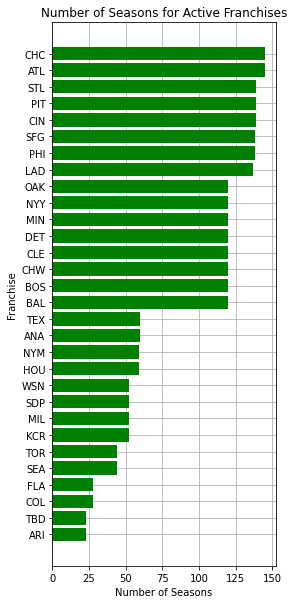

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Apply filter to keep only active franchises
filtered_franchises = franchise_summary.filter(franchise_summary["active"] == "Y")

# Sort the filtered DataFrame in increasing order by seasons
sorted_franchises = filtered_franchises.orderBy("seasons")

# Convert the sorted DataFrame to a Pandas DataFrame
pandas_df = sorted_franchises.toPandas()

# Create a horizontal bar chart
plt.figure(figsize=[4, 10])
plt.barh(pandas_df["franchID"], pandas_df["seasons"],color="green", zorder=2)


plt.xlabel("Number of Seasons")
plt.ylabel("Franchise")
plt.title("Number of Seasons for Active Franchises")

# Add grid
plt.grid()

# Display the chart
plt.show()


### B.5 – Franchises with Best Win/Loss Ratios

In [0]:
from pyspark.sql.functions import col

# Sort the DataFrame in decreasing order by WL_ratio
sorted_franchise_summary = franchise_summary.orderBy(col("WL_ratio").desc())

# Select the desired columns and display the first 10 rows
sorted_franchise_summary.select("franchID", "franchName", "seasons", "first_year", "last_year", "WL_ratio").show(10, truncate=False)


+--------+-------------------------+-------+----------+---------+--------+
|franchID|franchName               |seasons|first_year|last_year|WL_ratio|
+--------+-------------------------+-------+----------+---------+--------+
|BNA     |Boston Red Stockings     |5      |1871      |1875     |3.75    |
|MLU     |Milwaukee Brewers        |1      |1884      |1884     |2.0     |
|BRS     |Boston Reds              |2      |1890      |1891     |1.9333  |
|PNA     |Philadelphia Athletics   |5      |1871      |1875     |1.9186  |
|COR     |Cincinnati Outlaw Reds   |1      |1884      |1884     |1.9167  |
|HAR     |Hartford Dark Blues      |2      |1876      |1877     |1.625   |
|PRO     |Providence Grays         |8      |1878      |1885     |1.5755  |
|SBS     |St. Louis Brown Stockings|2      |1876      |1877     |1.4314  |
|MLA     |Milwaukee Brewers        |1      |1891      |1891     |1.4     |
|BWW     |Brooklyn Ward's Wonders  |1      |1890      |1890     |1.3571  |
+--------+---------------

### B.6 –Win/Loss Ratios in Recent Years

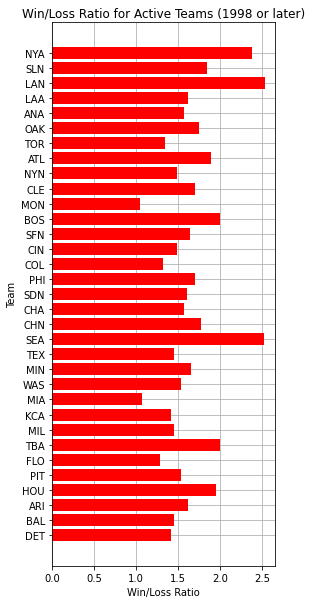

In [0]:
from pyspark.sql.functions import col

filtered_teams = teams.filter(col("yearID") >= 1998)
filtered_teams = filtered_teams.withColumn("WL_ratio", col("W") / col("L"))
sorted_teams = filtered_teams.orderBy(col("WL_ratio").asc())
pandas_teams = sorted_teams.toPandas()
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 10))
plt.barh(pandas_teams["teamID"], pandas_teams["WL_ratio"], color="red", zorder=2)
plt.xlabel("Win/Loss Ratio")
plt.ylabel("Team")
plt.title("Win/Loss Ratio for Active Teams (1998 or later)")
plt.grid()
plt.show()



##Section C – Batter Statistics

In this section, we will calculate and explore certain career statistics for each player who has ever batted in an MLB game. Two statistics in particular that we will look at are batting average and slugging percentage. A player’s batting average (BA) is their number of hits divided by their number of at-bats. A player’s slugging percentage (SP) is the average number of bases they have advanced during each at-bat.

In [0]:
from pyspark.sql.functions import sum, min, max, countDistinct, round
from pyspark.sql.functions import desc
import pandas as pd
import matplotlib.pyplot as plt

###C.1 – Calculating Career Statistics

In this subsection, we will calculate career statistics for each MLB batter.

In [0]:
# Group the records of the batting table by playerID
grouped_batting = batting.groupBy('playerID')

# Perform the aggregations
batters = grouped_batting.agg(
    sum('G').alias('G'),
    sum('AB').alias('AB'),
    sum('H').alias('H'),
    sum('2B').alias('2B'),
    sum('3B').alias('3B'),
    sum('HR').alias('HR'),
    min('yearID').alias('first_year'),
    max('yearID').alias('last_year'),
    countDistinct('yearID').alias('seasons')
)

# Apply a filter to keep only players with 1 or more at-bats
batters = batters.filter(batters.AB >= 1)

# Calculate batting average (BA) and slugging percentage (SP)
batters = batters.withColumn('BA', round(batters.H / batters.AB, 4))
batters = batters.withColumn('SP', round((batters.H + batters['2B'] + 2 * batters['3B'] + 3 * batters.HR) / batters.AB, 4))

# Join with the people table to add player information
batters = batters.join(people, 'playerID')

# Select the desired columns
batters = batters.select(
    'playerID', 'nameFirst', 'nameLast', 'first_year', 'last_year', 'seasons',
    'height', 'weight', 'G', 'AB', 'H', '2B', '3B', 'HR', 'BA', 'SP'
)

# Print the number of records
print("Number of records in batters:", batters.count())

# Display the first 10 rows
batters.show(10)

Number of records in batters: 17593
+---------+---------+-----------+----------+---------+-------+------+------+------+-------+------+-----+----+-----+------+------+
| playerID|nameFirst|   nameLast|first_year|last_year|seasons|height|weight|     G|     AB|     H|   2B|  3B|   HR|    BA|    SP|
+---------+---------+-----------+----------+---------+-------+------+------+------+-------+------+-----+----+-----+------+------+
|aardsda01|    David|    Aardsma|      2004|     2015|      9|    75|   215| 331.0|    4.0|   0.0|  0.0| 0.0|  0.0|   0.0|   0.0|
|aaronha01|     Hank|      Aaron|      1954|     1976|     23|    72|   180|3298.0|12364.0|3771.0|624.0|98.0|755.0| 0.305|0.5545|
|aaronto01|   Tommie|      Aaron|      1962|     1971|      7|    75|   190| 437.0|  944.0| 216.0| 42.0| 6.0| 13.0|0.2288|0.3273|
| aasedo01|      Don|       Aase|      1977|     1990|     13|    75|   190| 448.0|    5.0|   0.0|  0.0| 0.0|  0.0|   0.0|   0.0|
| abadan01|     Andy|       Abad|      2001|     2006|

###C.2 – Most Seasons Played
In this subsection, we will identify the 10 batters who have played in the most seasons.

In [0]:
# Sort the batters DataFrame in decreasing order by seasons
sorted_batters = batters.orderBy(desc('seasons'))

# Display the first 10 rows with the specified columns
sorted_batters.select('nameFirst', 'nameLast', 'first_year', 'last_year', 'seasons').show(10)

+---------+---------+----------+---------+-------+
|nameFirst| nameLast|first_year|last_year|seasons|
+---------+---------+----------+---------+-------+
|      Cap|    Anson|      1871|     1897|     27|
|    Nolan|     Ryan|      1966|     1993|     27|
|    Tommy|     John|      1963|     1989|     26|
|   Deacon|  McGuire|      1884|     1912|     26|
|    Eddie|  Collins|      1906|     1930|     25|
|   Rickey|Henderson|      1979|     2003|     25|
|  Charlie|    Hough|      1970|     1994|     25|
|      Jim|     Kaat|      1959|     1983|     25|
|    Jamie|    Moyer|      1986|     2012|     25|
|    Bobby|  Wallace|      1894|     1918|     25|
+---------+---------+----------+---------+-------+
only showing top 10 rows



###C.3 – Most At-Bats
In this subsection, we will identify the 10 batters who have had the greatest number of at-bats.

In [0]:
# Sort the batters DataFrame in decreasing order by AB
sorted_batters = batters.orderBy(desc('AB'))

# Display the first 10 rows with the specified columns
sorted_batters.select('nameFirst', 'nameLast', 'seasons', 'AB').show(10)

+---------+-----------+-------+-------+
|nameFirst|   nameLast|seasons|     AB|
+---------+-----------+-------+-------+
|     Pete|       Rose|     24|14053.0|
|     Hank|      Aaron|     23|12364.0|
|     Carl|Yastrzemski|     23|11988.0|
|      Cal|     Ripken|     21|11551.0|
|       Ty|       Cobb|     24|11436.0|
|    Eddie|     Murray|     21|11336.0|
|    Derek|      Jeter|     20|11195.0|
|   Adrian|     Beltre|     21|11068.0|
|    Robin|      Yount|     20|11008.0|
|     Dave|   Winfield|     22|11003.0|
+---------+-----------+-------+-------+
only showing top 10 rows



###C.4 – Highest Batting Average
In this subsection, we will identify the 10 batters who have the highest batting averages. To remove outliers, we
will limit our attention to players who have had at least 100 at-bats.

In [0]:
# Filter the batters DataFrame to keep only records with AB >= 100
filtered_batters = batters.filter(batters.AB >= 100)

# Sort the filtered DataFrame in decreasing order by BA
sorted_filtered_batters = filtered_batters.orderBy(desc('BA'))

# Display the first 10 rows with the specified columns
sorted_filtered_batters.select('nameFirst', 'nameLast', 'AB', 'BA').show(10)

+------------+---------+-------+------+
|   nameFirst| nameLast|     AB|    BA|
+------------+---------+-------+------+
|          Ty|     Cobb|11436.0|0.3663|
|        Ross|   Barnes| 2391.0|0.3597|
|      Rogers|  Hornsby| 8173.0|0.3585|
|Shoeless Joe|  Jackson| 4981.0|0.3558|
|        Levi|  Meyerle| 1443.0|0.3555|
|       Steve|     King|  272.0|0.3529|
|       Lefty|   O'Doul| 3264.0|0.3493|
|      George|    Nicol|  147.0|0.3469|
|          Ed|Delahanty| 7510.0|0.3458|
|         Cal|    McVey| 2513.0|0.3458|
+------------+---------+-------+------+
only showing top 10 rows



###C.5 – Highest Slugging Percentage
In this subsection, we will identify the 10 batters who have the slugging percentages. To remove outliers, we will
limit our attention to players who have had at least 100 at-bats.

In [0]:
# Filter the batters DataFrame to keep only records with AB >= 100
filtered_batters = batters.filter(batters.AB >= 100)

# Sort the filtered DataFrame in decreasing order by SP
sorted_filtered_batters = filtered_batters.orderBy(desc('SP'))

# Display the first 10 rows with the specified columns
sorted_filtered_batters.select('nameFirst', 'nameLast', 'AB', 'SP').show(10)

+---------+---------+------+------+
|nameFirst| nameLast|    AB|    SP|
+---------+---------+------+------+
|     Babe|     Ruth|8398.0|0.6898|
|   Yordan|  Alvarez| 321.0|0.6542|
|    Edwin|     Rios| 123.0|0.6341|
|      Ted| Williams|7706.0|0.6338|
|      Lou|   Gehrig|8001.0|0.6324|
|   Jimmie|     Foxx|8134.0|0.6093|
|    Barry|    Bonds|9847.0|0.6069|
|     Hank|Greenberg|5193.0| 0.605|
|     John|     Bass| 100.0|   0.6|
|     Mark|  McGwire|6187.0|0.5882|
+---------+---------+------+------+
only showing top 10 rows



###C.6 – Relationship between Batting Average and Slugging Percentage
In this subsection, we will graphically explore the relationship between batting average and slugging percentage.
To remove outliers, we will limit our attention to players who have had at least 100 at-bats.

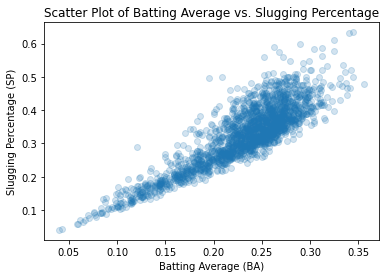

In [0]:
# Filter the batters DataFrame to keep only records with AB >= 100
filtered_batters = batters.filter(batters.AB >= 100)

# Draw a sample from the filtered DataFrame without replacement
sample = filtered_batters.sample(withReplacement=False, fraction=0.2, seed=1).toPandas()

# Create a scatter plot of SP against BA using the sample
plt.scatter(sample['BA'], sample['SP'], alpha=0.2)

# Set axis labels and title
plt.xlabel('Batting Average (BA)')
plt.ylabel('Slugging Percentage (SP)')
plt.title('Scatter Plot of Batting Average vs. Slugging Percentage')

# Display the plot
plt.show()

##Section D – Trends over Time
In this section, we will explore how certain statistics have changed during the history of the MLB.

###D.1 – Calculating Averages by Year
In this subsection, we will calculate the average height and weight of players by year, as well as the overall
batting averages and slugging percentages for all players by year.

In [0]:
joined = batting.join(people, 'playerID')
joined = joined.select(
    'playerID', 'nameFirst', 'nameLast', 
    'height', 'weight', 'AB', 'H', '2B', '3B', 'HR', 'yearID'
)

by_year = (
    joined
    .groupBy('yearID')
    .agg(
        expr('mean(weight) as avg_wt'),
        expr('mean(height) as avg_ht'),
        expr('sum(AB) as AB'),
        expr('sum(H) as H'),
        expr('sum(2B) as 2B'),
        expr('sum(3B) as 3B'),
        expr('sum(HR) as HR')
    )
    .withColumn('BA', expr('round(H/ AB,4)'))
    .withColumn('SP', expr('round((H+ 2B+3B+HR)/AB,4)'))
    .sort('yearID')
)
by_year_pdf = by_year.toPandas()
by_year_pdf.head()




,yearID,avg_wt,avg_ht,AB,H,2B,3B,HR,BA,SP
0,1871,157.049505,68.509804,10822.0,3101.0,434.0,239.0,47.0,0.2865,0.3531
1,1872,159.847458,68.533333,15665.0,4467.0,581.0,145.0,37.0,0.2852,0.3339
2,1873,160.236559,68.612903,16959.0,4926.0,570.0,211.0,47.0,0.2905,0.3393
3,1874,161.075269,68.582418,19104.0,5224.0,634.0,194.0,40.0,0.2735,0.3189
4,1875,162.269461,68.725610,26833.0,6812.0,839.0,273.0,40.0,0.2539,0.2968


###D.2 – Trends for Height and Weight
In this subsection, we will graphically explore the trends for player height and weight over time.

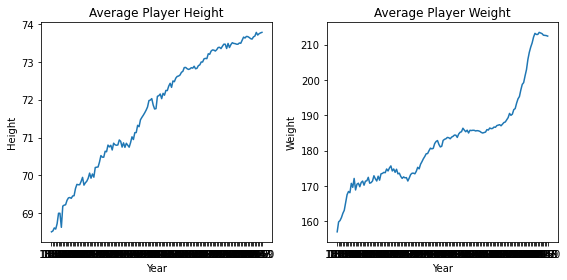

In [0]:
import matplotlib.pyplot as plt
 
# Convert the by_year DataFrame to an RDD
by_year_rdd = by_year.rdd
 
# Extract the yearID, avg_ht, and avg_wt columns from the RDD
yearID = by_year_rdd.map(lambda row: row['yearID']).collect()
avg_ht = by_year_rdd.map(lambda row: row['avg_ht']).collect()
avg_wt = by_year_rdd.map(lambda row: row['avg_wt']).collect()
 
# Create a figure containing two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
 
# Plot the average player height over time
ax1.plot(yearID, avg_ht)
ax1.set_title('Average Player Height')
ax1.set_xlabel('Year')
ax1.set_ylabel('Height')
 
# Plot the average player weight over time
ax2.plot(yearID, avg_wt)
ax2.set_title('Average Player Weight')
ax2.set_xlabel('Year')
ax2.set_ylabel('Weight')
 
# Adjust the layout to prevent overlapping of plot elements
plt.tight_layout()
 
# Display the figure
plt.show()

###D.3 – Trends for Batting Statistics
In this subsection, we will graphically explore the trends for batting average and slugging percentage over time.

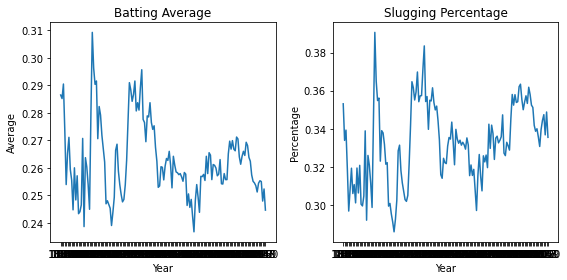

In [0]:
import matplotlib.pyplot as plt
 
# Convert the by_year DataFrame to an RDD
by_year_rdd = by_year.rdd
 
# Extract the yearID, BA, and SP columns from the RDD
yearID = by_year_rdd.map(lambda row: row['yearID']).collect()
BA = by_year_rdd.map(lambda row: row['BA']).collect()
SP = by_year_rdd.map(lambda row: row['SP']).collect()
 
# Create a figure containing two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
 
# Plot the batting average over time
ax1.plot(yearID, BA)
ax1.set_title('Batting Average')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average')
 
# Plot the slugging percentage over time
ax2.plot(yearID, SP)
ax2.set_title('Slugging Percentage')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage')
 
# Adjust the layout to prevent overlapping of plot elements
plt.tight_layout()
 
# Display the figure
plt.show()

###D.4 – Trends for American and National Leagues
There are currently two Major League Baseball leagues. These are the American League and the National
League. In this subsection, we will recreate the results from the previous two subsections, but we will look at the two
leagues separately. We will also limit our attention to years since 1960.

In [0]:
from pyspark.sql.functions import expr
 
# Filter the data for years since 1960 and specific leagues
filtered_data = batting.join(people, 'playerID').filter((batting.yearID >= 1960) & ((batting.lgID == 'AL') | (batting.lgID == 'NL')))
 
# Select the relevant columns
selected_data = filtered_data.select('yearID', 'lgID', 'weight', 'height', 'AB', 'H', '2B', '3B', 'HR')
 
# Calculate average weight, height, batting average (BA), and slugging percentage (SP) grouped by year and league
aggregated_data = selected_data.groupBy('yearID', 'lgID').agg(
    expr('mean(weight) as avg_wt'),
    expr('mean(height) as avg_ht'),
    expr('sum(AB) as AB'),
    expr('sum(H) as H'),
    expr('sum(2B) as 2B'),
    expr('sum(3B) as 3B'),
    expr('sum(HR) as HR')
).withColumn('BA', expr('round(H / AB, 4)')).withColumn('SP', expr('round((H + 2B + 3B + HR) / AB, 4)'))
 
# Sort the data by year and league
sorted_data = aggregated_data.sort('yearID', 'lgID')
 
# Convert the Spark DataFrame to Pandas DataFrame
result_df = sorted_data.toPandas()
 
# Print the first few rows of the result DataFrame
print(result_df.head())

  yearID lgID      avg_wt     avg_ht       AB        H      2B     3B      HR  \
0   1960   AL  186.476489  72.564263  41838.0  10689.0  1720.0  274.0  1086.0   
1   1960   NL  186.210692  72.663522  42176.0  10745.0  1722.0  384.0  1042.0   
2   1961   AL  185.774194  72.528536  54904.0  14037.0  2226.0  404.0  1534.0   
3   1961   NL  185.820339  72.755932  42128.0  11029.0  1749.0  350.0  1196.0   
4   1962   AL  185.378238  72.663212  55239.0  14068.0  2238.0  400.0  1552.0   

       BA      SP  
0  0.2555  0.3291  
1  0.2548  0.3294  
2  0.2557  0.3315  
3  0.2618  0.3400  
4  0.2547  0.3305  


###D.5 – Average Number of Games
In this subsection, we will determine the average number of games played by each team during each MLB
season.

In [0]:
from pyspark.sql.functions import avg
 
# Group the data by year and teamID, and calculate the average number of games (G) played
average_games = batting.groupBy('yearID', 'teamID').agg(avg('G').alias('avg_games'))
 
# Sort the data by year and teamID
sorted_games = average_games.sort('yearID', 'teamID')
 
# Convert the Spark DataFrame to Pandas DataFrame
result_df = sorted_games.toPandas()
 
# Print the first few rows of the result DataFrame
print(result_df.head())

  yearID teamID  avg_games
0   1871    BS1  25.636364
1   1871    CH1  23.000000
2   1871    CL1  20.076923
3   1871    FW1   9.666667
4   1871    NY2  27.000000


**Section E - Analyzing Player Salaries**

We will start by examining the distribution of player salaries over the years and identifying the players with the highest salaries.

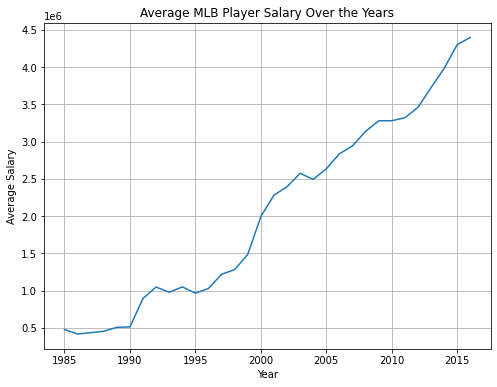

+------+------+----+---------+--------+
|yearID|teamID|lgID| playerID|  salary|
+------+------+----+---------+--------+
|  2009|   NYA|  AL|rodrial01|33000000|
|  2010|   NYA|  AL|rodrial01|33000000|
|  2016|   LAN|  NL|kershcl01|33000000|
|  2015|   LAN|  NL|kershcl01|32571000|
|  2011|   NYA|  AL|rodrial01|32000000|
|  2016|   ARI|  NL|greinza01|31799030|
|  2012|   NYA|  AL|rodrial01|30000000|
|  2016|   BOS|  AL|priceda01|30000000|
|  2013|   NYA|  AL|rodrial01|29000000|
|  2008|   NYA|  AL|rodrial01|28000000|
+------+------+----+---------+--------+



In [0]:
import matplotlib.pyplot as plt

# Load the Salaries table
salaries = spark.read.csv('/FileStore/tables/lahman/Salaries.csv', header=True, inferSchema=True)

# Group salaries by year and calculate the average salary
average_salaries = salaries.groupBy("yearID").avg("salary").orderBy("yearID")

# Create a line plot of average salaries over the years
plt.figure(figsize=(8, 6))
plt.plot(average_salaries.toPandas()["yearID"], average_salaries.toPandas()["avg(salary)"])
plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.title("Average MLB Player Salary Over the Years")
plt.grid(True)
plt.show()

# Find the players with the highest salaries
highest_salaries = salaries.orderBy("salary", ascending=False).limit(10)
highest_salaries.show()

**Section F - Analyzing Player Performance and Salaries**

We will join the "Salaries" and "Batting" tables to analyze how player performance relates to their salaries.

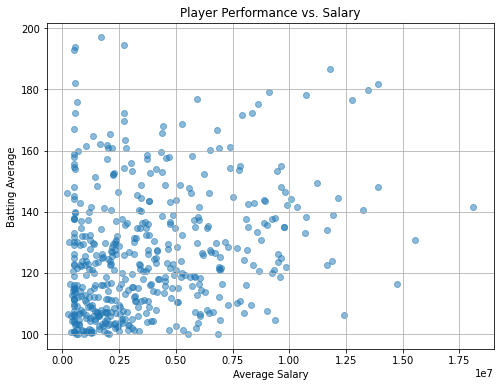

In [0]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Load the Batting table
batting = spark.read.csv('/FileStore/tables/lahman/Batting.csv', header=True, inferSchema=True)

# Join salaries and batting tables
player_performance = batting.join(salaries, ["playerID", "yearID"], "inner")

# Calculate batting average and salary for each player
player_stats = player_performance.groupBy("playerID").agg(
    F.mean("H").alias("batting_avg"),
    F.mean("salary").alias("average_salary")
)

# Filter players with at least 100 at-bats
player_stats = player_stats.filter(player_stats.batting_avg >= 100)

# Scatter plot of batting average against average salary
plt.figure(figsize=(8, 6))
plt.scatter(player_stats.toPandas()["average_salary"], player_stats.toPandas()["batting_avg"], alpha=0.5)
plt.xlabel("Average Salary")
plt.ylabel("Batting Average")
plt.title("Player Performance vs. Salary")
plt.grid(True)
plt.show()